In [1]:
import os
import ast
from tqdm import tqdm
import re
import pandas as pd


def load_jsonl(filename):
    assert os.path.exists(filename), filename
    with open(filename, 'r', encoding="utf8") as fp:
        fixed_data = ast.literal_eval(fp.read())
    return fixed_data

dfs = []
for model in ["llm-jp-3-13b-exp1-en_jstage", "llm-jp-3-13b-exp1-ja"]:
    items = []
    root = f"./results/avg_loss/{model}"
    for filename in tqdm(sorted(os.listdir(root))):
        if filename.endswith(".json"):
            match = re.match("iter_([0-9]+).json", filename)
            if match:
                iter_num = int(match.group(1))
            else:
                continue
            
            # if iter_num > 1000:
            #     continue
            item = {"iter": iter_num}
            filepath = os.path.join(root, filename)
            data = load_jsonl(filepath)
            for train_type in data:
                item[train_type] = data[train_type]["average_loss"]
            items.append(item)
    dfs.append(pd.DataFrame(items))


100%|██████████| 31/31 [00:26<00:00,  1.18it/s]


In [2]:
df_en, df_ja = dfs

/tmp/ipykernel_640381/2822196753.py:52: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(left=0)


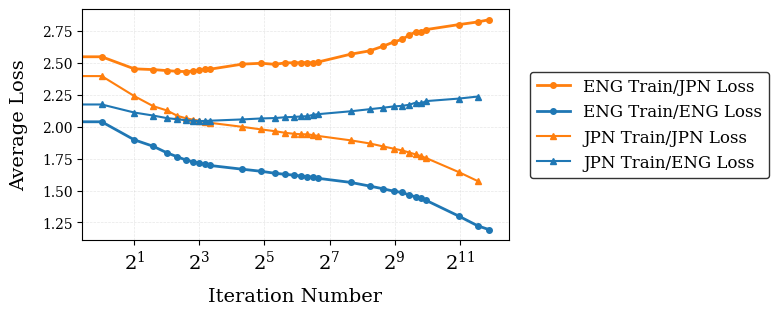

In [12]:
import matplotlib.pyplot as plt
import os

# Set global style for academic presentation
# plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['grid.alpha'] = 0.3

# Define a professional color palette
colors = {
    'ja': '#ff7f0e',  # Vibrant orange
    'en_jstage': '#1f77b4'  # Deep blue
}

# Create figure with improved dimensions
plt.figure(figsize=(5.5, 3))
ax = plt.gca()

# Plot: English training (solid lines)
df_en.plot(
    x='iter', y='ja',
    ax=ax, color=colors['ja'], linestyle='-', linewidth=2,
    label='ENG Train/JPN Loss', marker='o', markersize=4
)
df_en.plot(
    x='iter', y='en_jstage',
    ax=ax, color=colors['en_jstage'], linestyle='-', linewidth=2,
    label='ENG Train/ENG Loss', marker='o', markersize=4
)

# Plot: Japanese Training (dotted lines)
df_ja.plot(
    x='iter', y='ja',
    ax=ax, color=colors['ja'], linestyle='-', linewidth=1.5,
    label='JPN Train/JPN Loss', marker='^', markersize=4
)
df_ja.plot(
    x='iter', y='en_jstage',
    ax=ax, color=colors['en_jstage'], linestyle='-', linewidth=1.5,
    label='JPN Train/ENG Loss', marker='^', markersize=4
)

# Axes setup with enhanced formatting
ax.set_xscale('log', base=2)
ax.set_xlim(left=0)
ax.set_xlabel('Iteration Number', fontsize=14, labelpad=10)
ax.set_ylabel('Average Loss', fontsize=14, labelpad=10)
ax.tick_params(axis='x', labelsize=14)
ax.grid(True, linestyle='--', linewidth=0.5)
# ax.set_title('Average Loss by Language and Training Set', fontsize=14, pad=10)

# Legend on the right with improved styling
ax.legend(
    fontsize=12,
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),  # Adjusted for better spacing
    borderaxespad=0,
    frameon=True,
    edgecolor='black'
)

# Adjust layout and save with high quality
result_dir = "../figures"
if not os.path.exists(result_dir):
    os.makedirs(result_dir)
plt.savefig(
    os.path.join(result_dir, "1k-seq-loss.pdf"),
    dpi=300, bbox_inches="tight", facecolor='white'
)
# plt.close()

/tmp/ipykernel_2928023/1432533968.py:38: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(left=0)


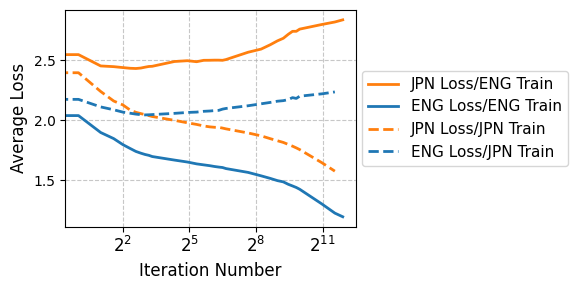

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
ax = plt.gca()

# Define consistent colors for evaluation Loss language
colors = {
    'ja': 'tab:orange',
    'en_jstage': 'tab:blue'
}

# Plot: English training (solid lines)
df_en.plot(
    x='iter', y='ja',
    ax=ax, color=colors['ja'], linestyle='-', linewidth=2,
    label='JPN Loss/ENG Train'
)
df_en.plot(
    x='iter', y='en_jstage',
    ax=ax, color=colors['en_jstage'], linestyle='-', linewidth=2,
    label='ENG Loss/ENG Train'
)

# Plot: Japanese Training (dotted lines)
df_ja.plot(
    x='iter', y='ja',
    ax=ax, color=colors['ja'], linestyle='--', linewidth=2,
    label='JPN Loss/JPN Train'
)
df_ja.plot(
    x='iter', y='en_jstage',
    ax=ax, color=colors['en_jstage'], linestyle='--', linewidth=2,
    label='ENG Loss/JPN Train'
)

# Axes setup
ax.set_xscale('log', base=2)
ax.set_xlim(left=0)
ax.set_xlabel('Iteration Number', fontsize=12)
ax.set_ylabel('Average Loss', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Legend on the right
ax.legend(
    fontsize=11,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),  # outside plot on the right
    borderaxespad=0,
)

plt.tight_layout()
# plt.show()
result_dir = "../figures"
plt.savefig(
    os.path.join(result_dir, f"1k-seq-loss.pdf"), 
    dpi=300, bbox_inches="tight")

